# Practical Notebook 2

## Pandas

In this course, we will use pandas to import the data into DataFrame objects.   
Pandas is a commonly used library working with and manipulating data in various formats, such as txt, csv, excel format, and more.  

You can read more about pandas [here](https://pandas.pydata.org/), or by searching online.

In [ ]:
# The first thing we need to do is to import pandas
import pandas as pd

# We will aslo change how the floating point numbers are displayed
pd.set_option("display.float_format", lambda x: f"{x:.5f}")

### Creating our own dataset to file

We will start by creating our own data set, but later on we will import the data from a file.

In [ ]:
names = ['Alice', 'Bob', 'Charlie']
animals = ['Dog', 'Cat', None]
age = [27, 12, 43]
sex = ['Female', 'Male', 'Male']

We will then merge the lists together using the *zip* function.

In [ ]:
people = list(zip(names, animals, age, sex))
print(people)

[('Alice', 'Dog', 27, 'Female'), ('Bob', 'Cat', 12, 'Male'), ('Charlie', None, 43, 'Male')]


Now we can make our merged list into a DataFrame object by using pandas.

In [ ]:
df = pd.DataFrame(data=people, columns=['Names','Animals','Age','Sex'])
print(df)

     Names Animals  Age     Sex
0    Alice     Dog   27  Female
1      Bob     Cat   12    Male
2  Charlie    None   43    Male


You can also export the dataframe to a csv file, where we use the function *to_csv* to export the file. You will find the file you created in the folder you are in. (In colab you will find the folder to the left.)
The index parameter is set to *False*, i.e. we won't write the row names to the new file (in this case the row names are *0, 1, 2*). The header parameter is set to *True*, i.e. we will write the column names to the file (in this case the column names are *Names*, *Animals*, *Age*, *Sex*).
You can change these parameters yourself to see the difference.

In [ ]:
df.to_csv('test_people.csv', index=False, header=True)

### Read a dataset from file

To read the data from a csv file we will use the function *read_csv*.

In [ ]:
df = pd.read_csv('test_people.csv')
print(df)

     Names Animals  Age     Sex
0    Alice     Dog   27  Female
1      Bob     Cat   12    Male
2  Charlie     NaN   43    Male


We can inspect the numerical values in the data using the function describe.

In [ ]:
print(df.describe())

           Age
count  3.00000
mean  27.33333
std   15.50269
min   12.00000
25%   19.50000
50%   27.00000
75%   35.00000
max   43.00000


And look at one specific column by using the names of the header.

In [ ]:
print(f"Here you will see the names: \n{df['Names']}")
print(f"\nHere you will see the animals: \n{df['Animals']}")
print(f"\nHere you will see the ages: \n{df['Age']}")
print(f"\nHere you will see the sex: \n{df['Sex']}")

Here you will see the names: 
0      Alice
1        Bob
2    Charlie
Name: Names, dtype: object

Here you will see the animals: 
0    Dog
1    Cat
2    NaN
Name: Animals, dtype: object

Here you will see the ages: 
0    27
1    12
2    43
Name: Age, dtype: int64

Here you will see the sex: 
0    Female
1      Male
2      Male
Name: Sex, dtype: object


You can also divide the groups into females and males.

In [ ]:
male, female = df['Sex'].value_counts()
print(f"Here we have {male} male(s) and {female} female(s).")

Here we have 2 male(s) and 1 female(s).


By looking only at one column, as we did before, we can find some interesting data about it as well.

In [ ]:
# finding the mean value of the ages (with 2 decimals)
print(f"mean: {df['Age'].mean():.2f}")
# and the standard deviation (with 2 decimals)
print(f"std: {df['Age'].std():.2f}")

mean: 27.33
std: 15.50


### Titanic

Now we will download and use a larger dataset, to get a better understanding about the pandas library. The dataset contains passenger data from Titanic, and later on we will predict "what sort of people were most likely to survive?". The passenger data has 7 features: Name, Sex, Socio-economic class, Siblings/Spouses Aboard, Parents/Children Aboard and Fare and a binary responce variable "survived".

In [ ]:
# Downloading the titanic dataset
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2021-01-20 19:25:42--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.1s    

2021-01-20 19:25:43 (371 KB/s) - ‘titanic.csv’ saved [44225/44225]



#### Assignment a)

In [2]:
# ASSIGNMENT:
# Load the data and get familiar with it 
import pandas as pd

df = pd.read_csv('titanic.csv')
print(df)


     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

#### Assignment b)

In [6]:
# ASSIGNMENT:
# Count the number of males and females

male, female = df['Sex'].value_counts()

print("Male: " +  str(male), "Female: " +  str(female))

Male: 573 Female: 314


#### Assignment c)

In [10]:
# ASSIGNMENT:
# Find the mean fare

print(f"Mean fare: {df['Fare'].mean():.2f}")

# Find the standard deviation of the fare

print(f"Std fare: {df['Fare'].std():.2f}")


Mean fare: 32.31
Std fare: 49.78


#### Assignment d)

In [24]:
# ASSIGNMENT:
# Count how many survived (1) and how many died (0)

# YOUR CODE HERE
d = df[df['Survived'] == 0]
died = d.shape[0]

s = df[df['Survived'] == 1]
survived = s.shape[0]


print("Died: " + str(died), "Survived: " + str(survived))

Died: 545 Survived: 342


#### Assignment e)

In [15]:
# ASSIGNMENT:
# count how many women and men survived

# YOUR CODE HERE

s = df[df['Survived'] == 1]
male, female = s['Sex'].value_counts()

print("Male: " + str(male), "Female: " + str(female))

Male: 233 Female: 109


#### Assignment f)

In [119]:
# ASSIGNMENT (1):
# Separate the dataset from Titanic into X and y,
# where y is the column Survived, and X is the rest.
# Inspect the data. Look at for instance the function "describe" in pandas

# YOUR CODE HERE

x = df.drop(['Survived'], axis=1)
y = df['Survived']

print(x.describe())
print('\n----------------------------------------------------------------\n')
print(y.describe())
print('\n-------------------------Standardized---------------------------\n')

# ASSIGNMENT (2):
# Standardize the data by subtracting the mean and dividing by the standard deviation.
# Inpect the data again to see that the mean is (close to) zero and the standard deviation is one.

x = (x - x.mean()) / x.std()
print(x.describe())
print('\n----------------------------------------------------------------\n')

y = (y - y.mean()) / y.std()
print(y.describe())
print('\n----------------------------------------------------------------\n')

# YOUR CODE HERE


           Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000               887.000000   
mean     2.305524   29.471443                 0.525366   
std      0.836662   14.121908                 1.104669   
min      1.000000    0.420000                 0.000000   
25%      2.000000   20.250000                 0.000000   
50%      3.000000   28.000000                 0.000000   
75%      3.000000   38.000000                 1.000000   
max      3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max                   6.000000  512.32920  

----------------------------------------------------------------

count    887.0

## Matplotlib

Matplotlib is a commonly used library for visualizing data in Python. Other visualization libraries exist for Python, such as seaborn, plotly, and more. Beyond the first practical notebook, we do not enforce any particular plotting library, but strongly encourage the use of Matplotlib. Below we will use the plotting functions inside of *matplotlib.pyplot*. You can read more about matplotlib [here](https://matplotlib.org/) and pyplot [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot).

### Examples

In [4]:
# import the relevant libraries
import matplotlib.pyplot as plt
import numpy as np

We will start by looking at some small lists.

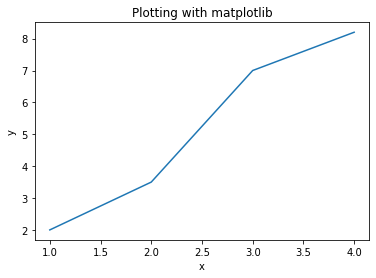

In [ ]:
# examples of some datapoint
x = [1,2,3,4]
y = [2,3.5,7,8.2]

# plotting the data using matplotlib.pyplot.plot
plt.plot(x, y)

# It is important to add labels for the axes and a title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotting with matplotlib")
# and always end with show(), which will show you the plot.
plt.show()

Plots can also be below each other, or side by side by using [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html).

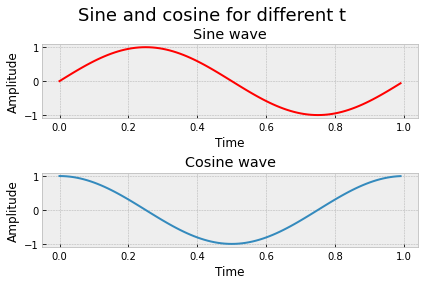

In [ ]:
# Vertical subplot

plt.style.use('bmh')

t = np.arange(0.0, 1.0, 0.01)
sin = np.sin(2*np.pi*t)
cos = np.cos(2*np.pi*t)

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

ax1 = fig.add_subplot(2,1,1)
ax1.plot(t, sin, color='red', lw=2)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax1.set_title('Sine wave')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(t, cos)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_title('Cosine wave')

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

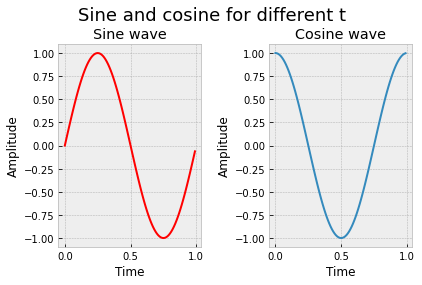

In [48]:
# Horizontal subplot

plt.style.use('bmh')

t = np.arange(0.0, 1.0, 0.01)
sin = np.sin(2*np.pi*t)
cos = np.cos(2*np.pi*t)

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

ax1 = fig.add_subplot(1,2,1)  # we have changed (2,1,1) to (1,2,1)
ax1.plot(t, sin, color='red', lw=2)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax1.set_title('Sine wave')

ax2 = fig.add_subplot(1,2,2)  # we have changed (2,1,2) to (1,2,2)
ax2.plot(t, cos)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_title('Cosine wave')

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

And with different stylings

In [ ]:
# Here are all the different "pre-configured" styles matplot lib supports
# https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

The plotts can also be both below each other and side by side at the same time (as a matrix) as you can see below. Here we have also plotted two graphs together in every figure, and added a color and a label for each one of them.

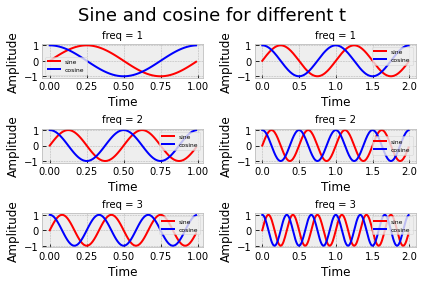

In [ ]:
# Matrix subplot

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

i = 1
for freq in [1, 2, 3]:
  for t_max in [1, 2]:
    t = np.arange(0.0, t_max, 0.01)
    sin = np.sin(2*freq*np.pi*t)
    cos = np.cos(2*freq*np.pi*t)

    ax = fig.add_subplot(3,2,i)
    ax.plot(t, sin, color='red', lw=2, label='sine')
    ax.plot(t, cos, color='blue', lw=2, label='cosine')
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time')
    ax.legend(fontsize=6)
    ax.set_title(f'freq = {freq}', fontsize=10)
    i += 1

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

### Plotting data from Pandas

Now we will plot some of the datapoints from the titanic dataset to visualize it.

In [ ]:
# Downloading the titanic dataset
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2021-01-20 19:53:21--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  43.19K  --.-KB/s    in 0.1s    

2021-01-20 19:53:21 (372 KB/s) - ‘titanic.csv.1’ saved [44225/44225]



In [2]:
# Load the titanic dataset for plotting
import pandas as pd
df = pd.read_csv('titanic.csv')

#### Assignment g)

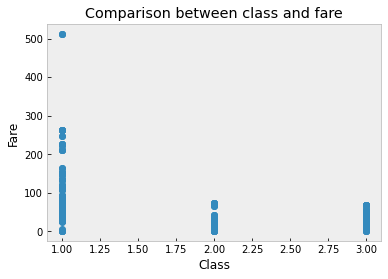

In [54]:
# ASSIGNMENT:
# compare the fare with the class of the ticket

# YOUR CODE HERE

x = df['Pclass']
y = df['Fare']

fig, ax = plt.subplots()
plt.stem(x, y, basefmt=' ', linefmt='None')

ax.set_ylabel('Fare')
ax.set_xlabel('Class')
ax.set_title('Comparison between class and fare')

ax.grid()


#### Assignment h)

It might also be a good idea to plot a histogram over the data, to get a better understanding of how the data looks. This can be done using the function *hist* from matplotlib.

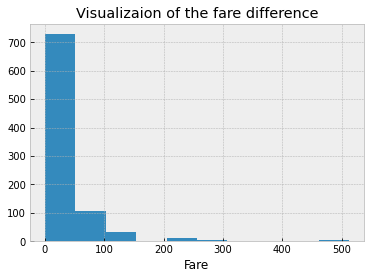

In [51]:
fare1 = df["Fare"]
plt.hist(fare1)
plt.xlabel("Fare")
plt.title("Visualizaion of the fare difference")
plt.show()

As you can see, most of the people paid less than 150 for the ticket.

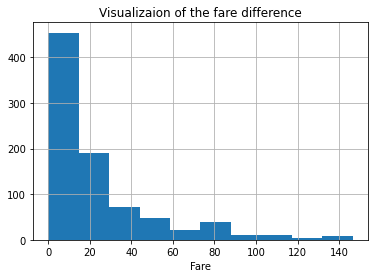

In [5]:
# ASSIGNMENT:
# Plott a histogram over the people who paid less than, or equal to, 150.

# YOUR CODE HERE

fare2 = df[df['Fare'] <= 150]['Fare']

fig, ax = plt.subplots()

plt.hist(fare2)
plt.xlabel("Fare")
plt.title("Visualizaion of the fare difference")

ax.grid()


#### Assignment i)

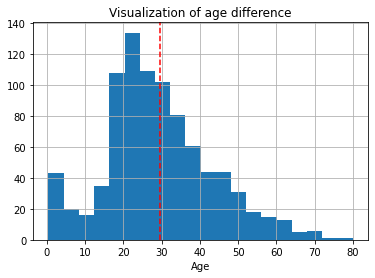

In [7]:
# ASSIGNMENT:
# plot a histogram over all the ages with 20 bins. Draw a vertical line at the mean age.

# YOUR CODE HERE

age = df['Age']
mean_age = age.mean()

fig, ax = plt.subplots()

plt.hist(age, bins=20)
plt.axvline(x=mean_age, color='r', ls='--')

plt.xlabel("Age")
plt.title("Visualization of age difference")

ax.grid()


#### Assignment j)

Sometimes it is better to plot the figures together in one figure instead. This can be done with subplot, as shown in the examples above.

In [2]:
# ASSIGNMENT:
# Make a subplot over the Fare, Class, and Age

# YOUR CODE HERE

# Horizontal subplot

plt.style.use('bmh')

t = np.arange(0.0, 1.0, 0.01)
sin = np.sin(2*np.pi*t)
cos = np.cos(2*np.pi*t)

fig = plt.figure()
fig.suptitle("All histograms in one plot", fontsize=18)



ax1 = fig.add_subplot(1,3,1)
ax1.hist(fare1)
ax1.set_xlabel("Fare")

ax2 = fig.add_subplot(1,3,2)  # we have changed (2,1,2) to (1,2,2)
ax2.hist(fare2)
ax2.set_xlabel("Fare")


ax3 = fig.add_subplot(1,3,3) 
ax3.hist(age, bins=20)
ax3.axvline(x=mean_age, color='r', ls='--')
ax3.set_xlabel("Age")



fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()


NameError: name 'plt' is not defined

#### Assignment k)

Now we want to compare the fare and class, as we did before, but this time we want to divide them into two colors, depending on if they survived or not.

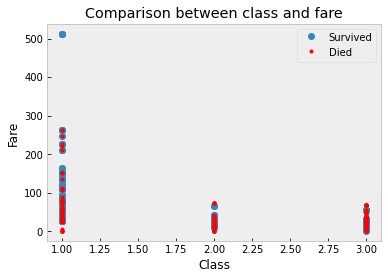

In [88]:
# ASSIGNMENT:
# Make a plot with red dots for all the people who died, and blue dots for the people who survived.

# YOUR CODE HERE

s = df[df['Survived'] == 1]
d = df[df['Survived'] == 0]

s_class = s['Pclass']
d_class = d['Pclass']

s_fare = s['Fare']
d_fare = d['Fare']

fig, ax = plt.subplots()
ax.stem(s_class, s_fare, basefmt=' ', linefmt='None', label="Survived")

markerline, stemline, baseline, = ax.stem(d_class, d_fare, basefmt=' ', linefmt='None', markerfmt='ro', label="Died")
plt.setp(markerline, markersize = 3)

ax.set_ylabel('Fare')
ax.set_xlabel('Class')
ax.set_title('Comparison between class and fare')

ax.grid()
ax.legend()


#### Assignment l)

It might also be interesting to visualize how many of the men and women survived. This can be done with the bar function, which will be given to you.

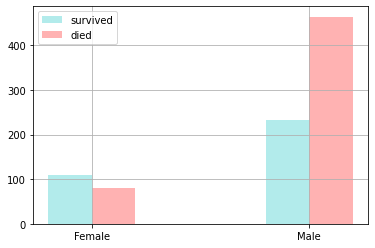

In [14]:
# ASSIGNMENT:
# Calculate how many women and men died and survived.

# YOUR CODE HERE

male_survived, female_survived = df[df.Survived == 1]['Sex'].value_counts()

male_died, female_died = df[df.Survived == 0]['Sex'].value_counts()


fig, ax = plt.subplots()


ax.grid()


plt.bar([0.9,1.9], [female_survived, male_survived] , color='c', label='survived', width=0.2, alpha=0.3)
plt.bar([1.1, 2.1], [female_died, male_died] , color='r', label='died', width=0.2, alpha=0.3)
plt.xticks([1,2], ['Female','Male'])
plt.legend()
plt.show()

### (Optional) Plot histogram and cumulative distubution

OPTIONAL:  
Plotting a Histogram of Random values

Your task is to generate 10000 random numbers that follows the normal distribution, with a mean, $\mu = 1$, and variance $\sigma^2 = 0.25$. 

Plot the **normalized** histogram with 50 bars and a contour plot.   

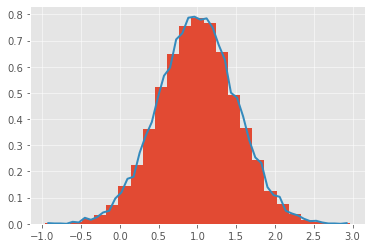

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.random.seed(42)

# OPTIONAL ASSIGNMENT:
# Draw 10000 random values from a normal distribution with:
#   mu = 1, sigma2 = 0.25
#  
# Plot the histogram and cumulative distribution 


# YOUR CODE HERE

plt.show()